In [1]:
import cv2

import matplotlib.pyplot as plt

In [2]:
IMAGE_PATH = '11.jpg'

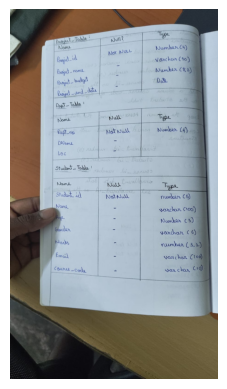

In [3]:


image = cv2.imread(IMAGE_PATH)

if image is None:
    print("Error: Could not read the image. Please make sure the file exists and is a valid image file.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image_rgb)
    plt.axis('off') 
    plt.show()

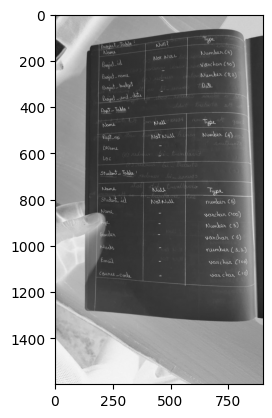

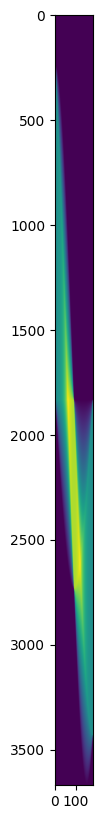

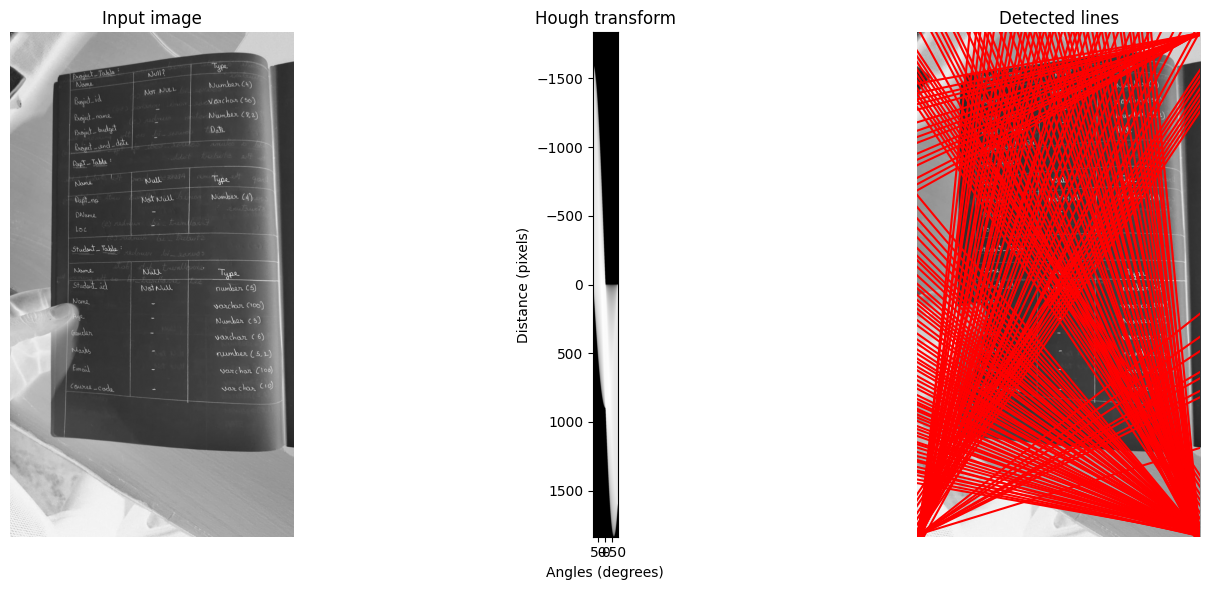

20.1117318435754


In [4]:

"""
@author: Sreenivas Bhattiprolu

Hough Transform to detect straight lines and measure angles between them. 

https://en.wikipedia.org/wiki/Hough_transform

The origin is the top left corner of the original image. X and Y axis are 
horizontal and vertical edges respectively. The distance is the minimal 
algebraic distance from the origin to the detected line. The angle accuracy 
can be improved by decreasing the step size in the theta array.

https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html#sphx-glr-auto-examples-edges-plot-line-hough-transform-py

Image downloaded from: https://geometryhelp.net/wp-content/uploads/2019/04/intersecting-lines.jpg
Then inverted to dark background.
"""

from skimage.transform import (hough_line, hough_line_peaks)
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread(IMAGE_PATH, 0) #Fails if uses as-is due to bright background.
#Also try lines2 to see how it only picks up straight lines
#Invert images to show black background
image = ~image  #Invert the image (only if it had bright background that can confuse hough)
plt.imshow(image, cmap='gray')

# Set a precision of 1 degree. (Divide into 180 data points)
# You can increase the number of points if needed. 
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 180)

# Perform Hough Transformation to change x, y, to h, theta, dist space.
hspace, theta, dist = hough_line(image, tested_angles)

plt.figure(figsize=(10,10))
plt.imshow(hspace)  


#Now, to find the location of peaks in the hough space we can use hough_line_peaks
h, q, d = hough_line_peaks(hspace, theta, dist)


#################################################################
#Example code from skimage documentation to plot the detected lines
angle_list=[]  #Create an empty list to capture all angles

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap='gray')

origin = np.array((0, image.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

###############################################################
# Convert angles from radians to degrees (1 rad = 180/pi degrees)
angles = [a*180/np.pi for a in angle_list]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(180 - angle_difference)   #Subtracting from 180 to show it as the small angle between two lines

Using threshold value: 162.09 (based on max row avg 216.12 * factor 0.75)
Detected split points (row indices): [0, 1195, 1280]
Splitting into 2 sections.
Saved section 1: .\7_section_001.png (rows 0 to 1195)
Saved section 2: .\7_section_002.png (rows 1195 to 1280)
